# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [ ]:
!pip install openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Ось так можемо переглянути, які є листки в Excel файлі:

In [2]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = r'C:\Users\ATK\Desktop\My course Python Natali\Final project\Grocery Database.xlsx'

In [3]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [4]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [5]:
df = pd.read_excel(path_to_file)

### Визначаємо структуру даних

In [6]:
df.head(3)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693


In [7]:
print(f'Набір даних містить {df.shape[0]} рядків та {df.shape[1]} колонок.')

Набір даних містить 50447 рядків та 32 колонок.


In [8]:
# перевіряємо типи даних
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [9]:
#також дивимося загальні статистики
with pd.option_context("display.precision", 2):
    display(df.describe())

,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447.00,50447.00,5.04e+04,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00,5.04e+04,50447.00,50447.00,50447.00,50447.00
mean,2017.67,6.48,9.89e+09,18.36,35.80,7.42,1.55,0.03,11.17,66.70,0.09,72.38,0.11,1.50e-01,0.74,1.20,1.73,8.58
std,1.11,3.45,7.64e+07,16.16,14.02,4.75,0.65,0.01,9.23,45.27,0.02,49.09,0.03,1.32e-13,0.03,1.06,1.43,7.13
min,2016.00,1.00,7.92e+09,0.00,15.00,0.84,1.00,0.01,0.80,0.98,0.06,1.04,0.05,1.50e-01,0.70,0.07,0.13,0.61
25%,2017.00,3.00,9.84e+09,6.00,23.00,4.28,1.00,0.02,5.21,35.33,0.07,38.62,0.08,1.50e-01,0.72,0.55,0.81,4.08
50%,2018.00,7.00,9.90e+09,14.00,35.00,5.98,2.00,0.03,8.63,58.59,0.07,63.91,0.11,1.50e-01,0.74,0.93,1.33,6.65
75%,2019.00,10.00,9.95e+09,26.00,47.00,9.47,2.00,0.04,14.02,90.58,0.10,98.08,0.13,1.50e-01,0.77,1.51,2.18,10.83
max,2019.00,12.00,1.00e+10,116.00,75.00,40.33,9.00,0.05,299.83,527.67,0.12,559.33,0.15,1.50e-01,0.80,26.23,46.85,239.24


In [10]:
#певевіримо чи немає пропущених значень
df.isnull().sum().sort_values(ascending=False)

Receipt Number         0
Date                   0
Operating Cost         0
Profit Margin          0
% Product Cost         0
% Operating Cost       0
% Profit Margin        0
Bank Name              0
Payment Mode           0
Gross Bill Amount      0
GST                    0
Net Bill Amount        0
Amount                 0
DISC                   0
QTY                    0
Price                  0
Description            0
Brand                  0
Items                  0
Sub_Category           0
Category               0
Country                0
City                   0
Gender                 0
Age                    0
Loyalty Card Points    0
Membership ID          0
Mobile Number          0
Time                   0
Month                  0
Year                   0
Product Cost           0
dtype: int64

### 1. Порахуємо середню кількість товарів в чеку помісячно

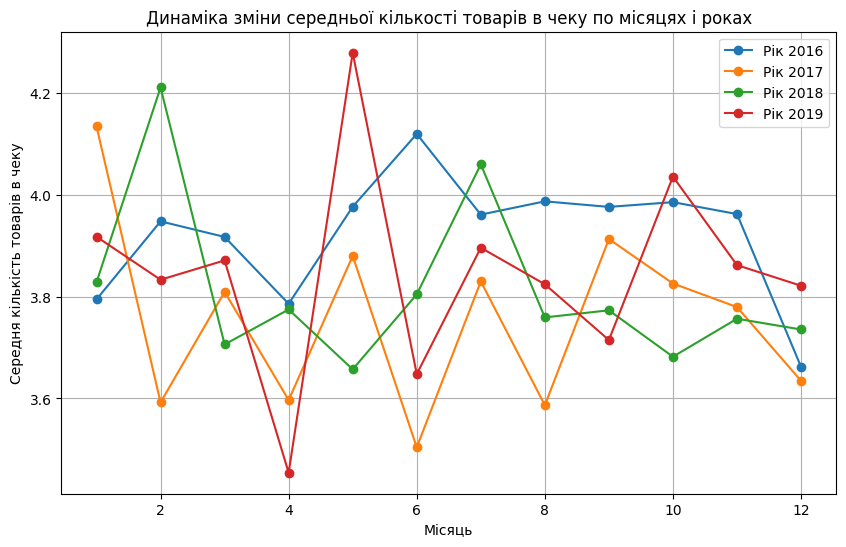

In [11]:
# Згруповуємо дані за роком, місяцем та чеком
average_items_per_receipt_by_month = df.groupby(['Year', 'Month', 'Receipt Number'])['Items'].nunique().reset_index()

# Заповнюємо відсутні значення середніми значеннями для кожного місяця і року
average_items_per_receipt_by_month = average_items_per_receipt_by_month.groupby(['Year', 'Month'])['Items'].mean().reset_index()

# Будуємо графік
plt.figure(figsize=(10, 6))
for year in average_items_per_receipt_by_month['Year'].unique():
    data_year = average_items_per_receipt_by_month[average_items_per_receipt_by_month['Year'] == year]
    label = f'Рік {year}'
    plt.plot(data_year['Month'], data_year['Items'], marker='o', label=label)

plt.xlabel('Місяць')
plt.ylabel('Середня кількість товарів в чеку')
plt.title('Динаміка зміни середньої кількості товарів в чеку по місяцях і роках')
plt.legend()
plt.grid(True)
plt.show()


##### Висновок: можемо побачити деяку сезонність з малою к-стю товарів в чеку в квітні та червні. Можна саме в цих місяцях придумати активність, що зможе допродати ще плюс одну одиницю.

### 2. Знайти клієнта з найбільшим чеком

In [12]:
total_purchase_by_customer = df.groupby('Membership ID')['Net Bill Amount'].sum().reset_index()

# знаходимо номер чеку з найбільшою сумою
max_receipt_number = df[df['Net Bill Amount'] == df['Net Bill Amount'].max()]['Receipt Number'].values[0]

# знаходимо клієнта, який зробив чек з найбільшою сумою
customer_with_highest_receipt = df[df['Receipt Number'] == max_receipt_number]['Membership ID'].values[0]

# знаходимо саму суму Amount
highest_amount = df['Net Bill Amount'].max()

print(f"Клієнт з найдорожчим чеком (Membership ID): {customer_with_highest_receipt}")
print(f"Найдорожчий чек має номер: {max_receipt_number}")
print(f"Сума найдорожчого чека: {highest_amount}")


Клієнт з найдорожчим чеком (Membership ID): MIDMY0086
Найдорожчий чек має номер: GMK02821
Сума найдорожчого чека: 527.6679999999999


### 3. Топ-10 товарів за кількістю чеків з ними

In [14]:
# групуємо дані за товаром
top_10_products = df.groupby('Items')['Receipt Number'].nunique().reset_index()

top_10_products.columns = ['Items', 'Кількість_чеків']

# сортуємо за кількістю чеків у спадаючому порядку
top_10_products = top_10_products.sort_values(by='Кількість_чеків', ascending=False).head(10)

print("Топ-10 товарів за кількістю чеків:")
print(top_10_products)


Топ-10 товарів за кількістю чеків:
                                           Items  Кількість_чеків
395              Sainsbury salted tortilla chips              849
33                              Ashai Lager Beer              813
233                           Lamb pate dog food              653
24                     Anchor salted pure butter              647
315          Nutro Beef with vegetables dog food              646
20                    Alpo Chicken pate dog food              641
161                               Fresh Soyamilk              628
339  PEDIGREE Adult complete nuritition dog food              625
333                     Original wholemeal bread              610
6                   3 in 1 cereal drink original              496


##### Висновок: ці 10 позицій є популярними, можна взяти до уваги в логістиці, щоб вони завжди були в наявності.

### 4. Чи є залежність між балами та витраченими грошима?

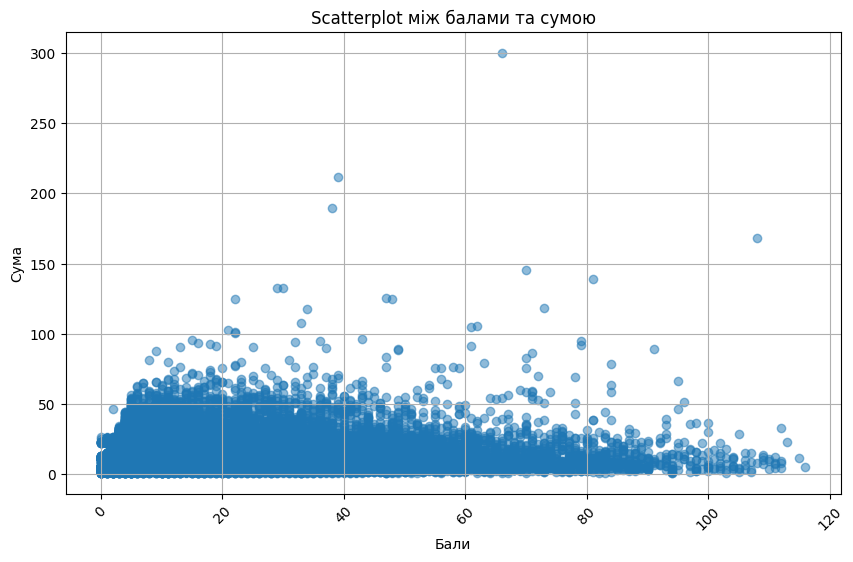

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Loyalty Card Points'], df['Amount'], alpha=0.5)
plt.xlabel('Бали')
plt.ylabel('Сума')
plt.title('Scatterplot між балами та сумою')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 5. Яка країна  найбільше  продає по кількості товару Sub_Category=Frozen Seafood?

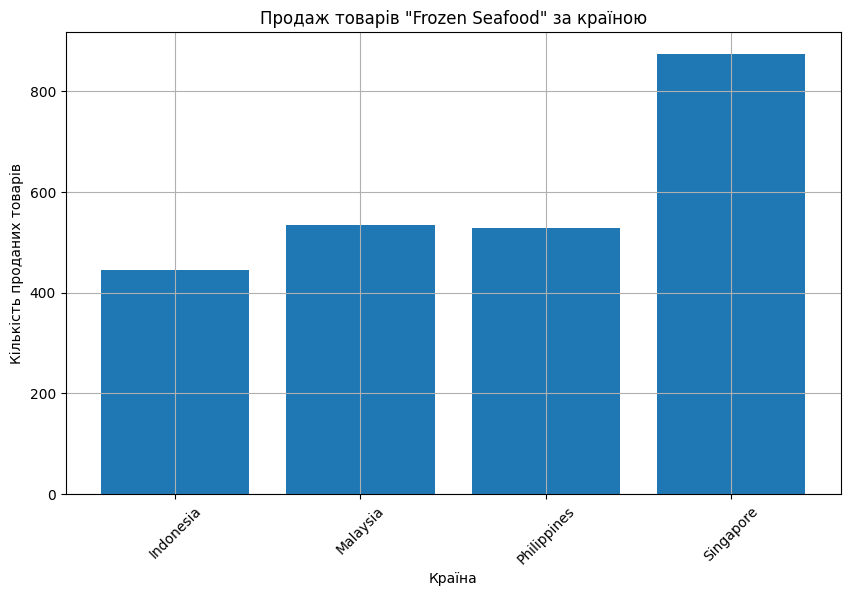

Країни з кількістю проданих товарів 'Frozen Seafood':
       Country  QTY
0    Indonesia  445
1     Malaysia  534
2  Philippines  528
3    Singapore  874
Країна, яка найбільше продає товар підкатегорії 'Frozen Seafood' за кількістю: Singapore
Кількість проданого товару: 874


In [16]:
# фільтруємо дані
filtered_df = df[df['Sub_Category'] == 'Frozen Seafood']

# групуємо дані за країною
country_sales = filtered_df.groupby('Country')['QTY'].sum().reset_index()

# знайдемо індекс рядка з найбільшою кількістю товару
max_index = country_sales['QTY'].idxmax()

# знайдемо країну та кількість для рядка з найбільшою кількістю товару
max_country = country_sales.loc[max_index, 'Country']
max_qty = country_sales.loc[max_index, 'QTY']

# побудуємо графік
plt.figure(figsize=(10, 6))
plt.bar(country_sales['Country'], country_sales['QTY'])
plt.xlabel('Країна')
plt.ylabel('Кількість проданих товарів')
plt.title('Продаж товарів "Frozen Seafood" за країною')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Країни з кількістю проданих товарів 'Frozen Seafood':")
print(country_sales)
print(f"Країна, яка найбільше продає товар підкатегорії 'Frozen Seafood' за кількістю: {max_country}")
print(f"Кількість проданого товару: {max_qty}")


### 6. У який час доби були найбільші продажі?

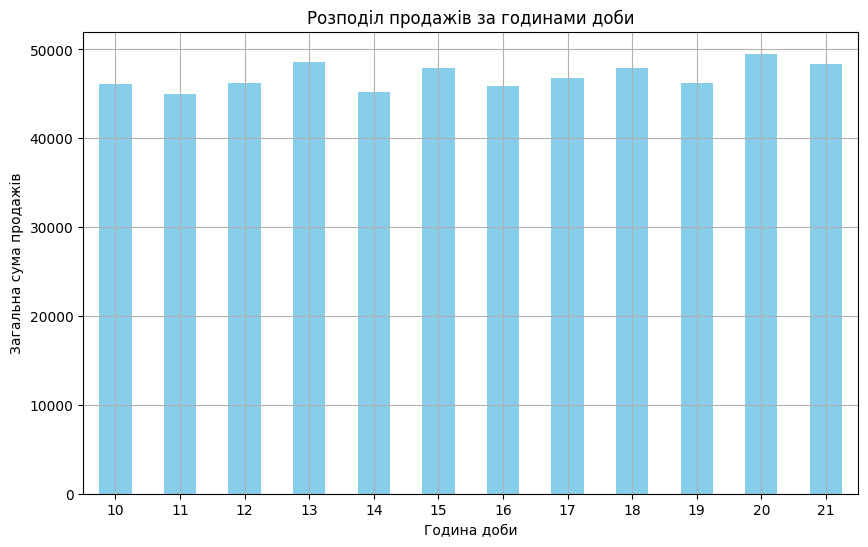

In [17]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)

# групуємо дані за годинами і підраховуємо загальну кількість продажів
hourly_sales = df.groupby('Hour')['Amount'].sum()

# будуємо графік
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Година доби')
plt.ylabel('Загальна сума продажів')
plt.title('Розподіл продажів за годинами доби')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()



##### Висновок: найбільш популярними є 13 та 20 години. В цей час варто збільшувати кількість кас та касирів.

### 7. Які категорії товарів мають найвищий оборот?

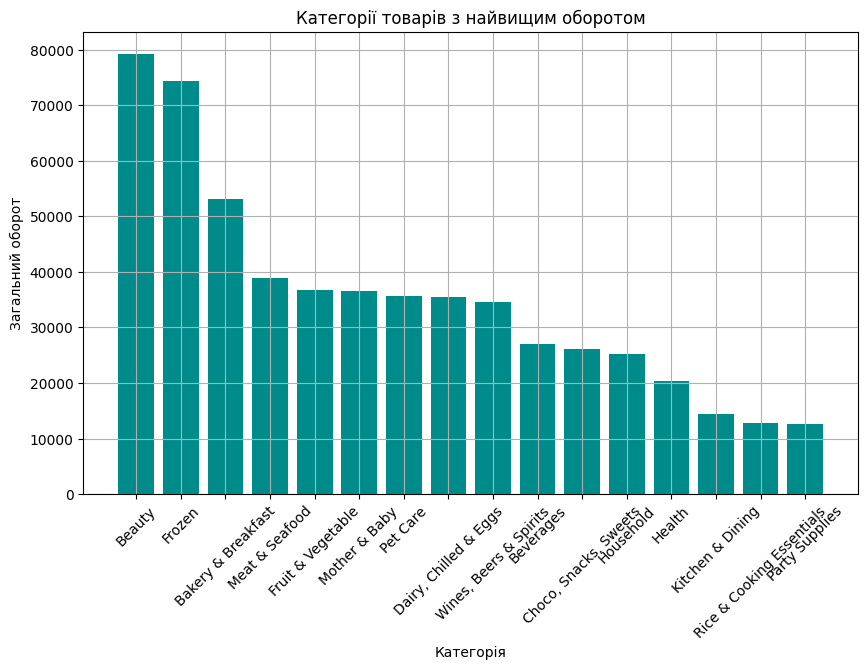

In [18]:
pivot_table = df.pivot_table(index='Category', values='Amount', aggfunc='sum')

sorted_pivot_table = pivot_table.sort_values(by='Amount', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_pivot_table.index, sorted_pivot_table['Amount'], color='darkcyan')
plt.xlabel('Категорія')
plt.ylabel('Загальний оборот')
plt.title('Категорії товарів з найвищим оборотом')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**